# Diagnosing Heart Disease
## Using ML Explainability Tools and Techniques

# Contents

1. [Introduction ](#section1)
2. [The Data](#section2)
3. [The Model](#section3)
4. [The Explanation](#section4)
5. [Conclusion](#section5)

<a id='section1'></a>

# Introduction

A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. There are many key factors which warns that the person may/maynot getting chance of heart attack.This dataset gives a number of variables along with a target condition of having or not having heart disease. This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.

In [10]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier #for the model

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split #for data splitting

import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

<a id='section2'></a>

# The Data

In [11]:
#load the data
data = pd.read_csv("../input/heart.csv")

data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* Age (age in years)
* Sex (1 = male; 0 = female)
* CP (chest pain type)(1: typical angina, 2:atypical angina, 3: non-anginal pain, 4: asymptomatic)
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECH (resting electrocardiographic results)( 0: normal, 1 =having ST-Twave abnormality, 2 =showing probable or definite left ventricular hypertrophy by Estes' ceiteria)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment)( 1: upsloping,  2: flat, 3: downsloping)
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL: thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* TARGET: Heart disease (1=yes,  0= no)

In [14]:
#label of each column has been changed to be more clear
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
                'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [31]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

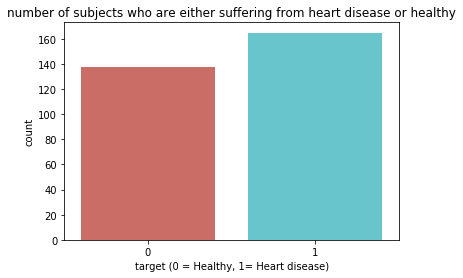

In [32]:


sns.countplot(x="target", data=data, palette="hls").set_title('number of subjects who are either suffering from heart disease or healthy')
plt.xlabel("target (0 = Healthy, 1= Heart disease)")
plt.show()

In [33]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

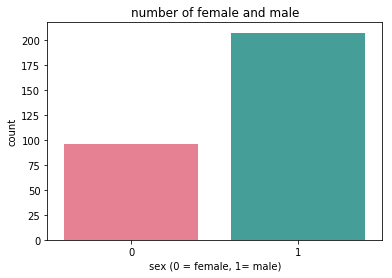

In [37]:
sns.countplot(x='sex', data=data, palette="husl"). set_title('number of female and male')
plt.xlabel("sex (0 = female, 1= male)")
plt.show()

# The Model

The next part fits a random forest model to the data,

In [11]:
X_train, X_test, y_train, y_test=train_test_split(data.drop('target',1), data['target'], test_size=0.2, random_state=0)

In [21]:
#LogisticRegression
logre = LogisticRegression()
model = logre.fit(X_train, y_train)
logre_predict = logre.predict(X_test)
logre_conf_matrix = confusion_matrix(y_test, logre_predict)
logre_acc_score = accuracy_score(y_test, logre_predict)
print("confussion matrix")
print(logre_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",logre_acc_score*100,'\n')
print(classification_report(y_test,logre_predict))

confussion matrix
[[22  5]
 [ 4 30]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [25]:
#K-NeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[19  8]
 [13 21]]


Accuracy of K-NeighborsClassifier: 65.57377049180327 

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        27
           1       0.72      0.62      0.67        34

   micro avg       0.66      0.66      0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.67      0.66      0.66        61



In [22]:
#Extreme Gradient Boost
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Extreme Gradient Boost: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [27]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [34]:
#Random Forest Classfier
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[22  5]
 [ 3 31]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [35]:
'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 2 25]
 [ 1 33]]


Accuracy of Support Vector Classifier: 57.377049180327866 

              precision    recall  f1-score   support

           0       0.67      0.07      0.13        27
           1       0.57      0.97      0.72        34

   micro avg       0.57      0.57      0.57        61
   macro avg       0.62      0.52      0.43        61
weighted avg       0.61      0.57      0.46        61

